In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [96]:
#Importing the income dataset
df = pd.read_csv ("census-income.data.csv", index_col = None, names=['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', "hours_per_week", "native_country", 'income'])

In [98]:
#Previewing the data
df.head(20)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [125]:
#Finding missing values (?) for each variables, manually, indiviudally. 
# df['age'].unique()
# df['workclass'].unique()
# df['fnlwgt'].unique()
# df['education'].unique()
# df['education_num'].unique()
# df['marital_status'].unique()
# df['occupation'].unique()
# df['relationship'].unique()
# df['race'].unique()
# df['sex'].unique()
# df['capital_gain'].unique()
# df['capital_loss'].unique()
# df['hours_per_week'].unique()
# df['native_country'].unique()
# df['income'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 34, 25, 43, 40,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 47, 46,
       36, 79, 27, 18, 33, 76, 55, 61, 70, 64, 71, 66, 51, 58, 26, 17, 60,
       90, 75, 65, 77, 62, 63, 67, 74, 72, 69, 68, 73, 81, 78, 88, 80, 84,
       83, 85, 82, 86], dtype=int64)

In [126]:
#Replace ? with NAN so that we can remove it
df.replace(' ?', np.nan, inplace=True)
df.head(15)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [127]:
#Checking the number of missing values
missing_values = df.isnull().sum()
print("missing_values:")
print(missing_values)

missing_values:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [128]:
#Dropping the missing values
df = df.dropna()

df.head(15)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [129]:
#No missing values present
missing_values = df.isnull().sum()
print("missing_values:")
print(missing_values)

missing_values:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [130]:
#looking at the datatype
print(df.info())

#have to transform the variables for regression

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [132]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [133]:
#encoding categorical variables to numeric codes
from sklearn.preprocessing import LabelEncoder

#calling labelencoder
lab_enc = LabelEncoder()

#performing label encoding in the select features
df['workclass'] = lab_enc.fit_transform(df['workclass'])
df['education'] = lab_enc.fit_transform(df['education'])
df['marital_status'] = lab_enc.fit_transform(df['marital_status'])
df['occupation'] = lab_enc.fit_transform(df['occupation'])
df['relationship'] = lab_enc.fit_transform(df['relationship'])
df['race'] = lab_enc.fit_transform(df['race'])
df['sex'] = lab_enc.fit_transform(df['sex'])
df['native_country'] = lab_enc.fit_transform(df['native_country'])


In [134]:
print(df['income'].value_counts())
#  # <=50K    24720
#  # >50K      7841

#Encoding for label. If <=50k then 0 else 1
label_info = {' <=50K':0, ' >50K':1}
df['income'] = df['income'].map(label_info)
# # source:https://stackoverflow.com/questions/65716571/encoding-column-pandas-using-if-condition

# # after encoding 
print(f"After encoding", df['income'].value_counts())

income
 <=50K    22654
 >50K      7508
Name: count, dtype: int64
After encoding income
0    22654
1     7508
Name: count, dtype: int64


In [135]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [137]:
#Selecting features and splitting the datasets into features and label
selected_features = ['age', 'workclass', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', "hours_per_week", "native_country"]

x = df[selected_features] #feature
y = df.income #label

In [138]:
#Splitting the dataset

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=7)

In [139]:
#Logistic Regression
#Source: https://www.datacamp.com/tutorial/understanding-logistic-regression-python?irclickid=XPG32xUYdxyPWbHWdp29132wUkFSTqSZwQmx3c0&irgwc=1&im_rewards=1&utm_medium=affiliate&utm_source=impact&utm_campaign=000000_1-2003851_2-mix_3-all_4-na_5-na_6-na_7-mp_8-affl-ip_9-na_10-bau_11-Bing%20Rebates%20by%20Microsoft&utm_content=BANNER&utm_term=EdgeBingFlow

#setting a seed
model1 = LogisticRegression(max_iter=1000,random_state=7)

#fitting the model using our data
model1.fit(x_train, y_train)

#predicting on the test data.
y_pred = model1.predict(x_test)

In [140]:
print(y_pred)

[0 0 0 ... 0 0 1]


In [141]:
#Evaluation of model

#first using confusion matrix

from sklearn import metrics

confusion_mat = metrics.confusion_matrix(y_test, y_pred)
confusion_mat

array([[5215,  396],
       [1103,  827]], dtype=int64)

In [142]:
#Classification report
from sklearn.metrics import classification_report

income_label = ['<=50k', '>50k']

print(classification_report(y_test, y_pred, target_names=income_label))

              precision    recall  f1-score   support

       <=50k       0.83      0.93      0.87      5611
        >50k       0.68      0.43      0.52      1930

    accuracy                           0.80      7541
   macro avg       0.75      0.68      0.70      7541
weighted avg       0.79      0.80      0.78      7541



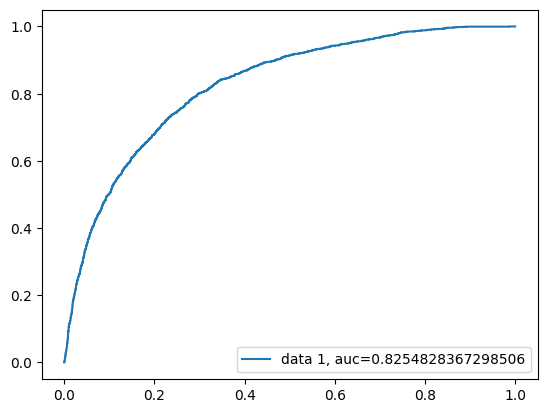

In [143]:
#ROC Curve
import matplotlib.pyplot as plt

y_pred_probability = model1.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr, tpr, label = "data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [201]:
#now checking from the test data
test = pd.read_csv("test.csv", index_col = None, names=['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', "hours_per_week", "native_country", 'income'])

test.head(30)




,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


In [184]:
#Finding missing values (?) for each variables, manually, indiviudally. 
# df['age'].unique()
# df['workclass'].unique()
# df['fnlwgt'].unique()
# df['education'].unique()
# df['education_num'].unique()
# df['marital_status'].unique()
# df['occupation'].unique()
# df['relationship'].unique()
# df['race'].unique()
# df['sex'].unique()
# df['capital_gain'].unique()
# df['capital_loss'].unique()
# df['hours_per_week'].unique()
# df['native_country'].unique()
# df['income'].unique()



In [202]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [203]:
##Dropping all the missing values
#Replace ? with NAN so that we can remove it
df.replace('  ?', np.nan, inplace=True)
df.head(15)

#No missing values present
missing_values = df.isnull().sum()
print("missing_values:")
print(missing_values)

missing_values:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [204]:

test.head(30)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


In [205]:
#encoding categorical variables to numeric codes
from sklearn.preprocessing import LabelEncoder

#calling labelencoder
lab_enc = LabelEncoder()

#performing label encoding in the select features
test['workclass'] = lab_enc.fit_transform(test['workclass'])
test['education'] = lab_enc.fit_transform(test['education'])
test['marital_status'] = lab_enc.fit_transform(test['marital_status'])
test['occupation'] = lab_enc.fit_transform(test['occupation'])
test['relationship'] = lab_enc.fit_transform(test['relationship'])
test['race'] = lab_enc.fit_transform(test['race'])
test['sex'] = lab_enc.fit_transform(test['sex'])
test['native_country'] = lab_enc.fit_transform(test['native_country'])

In [206]:
test.head()

#? got converted to zero

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,38,<=50K.
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,38,<=50K.
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,38,>50K.
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,38,>50K.
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,38,<=50K.


In [207]:
test['income'].unique()

array(['<=50K.', '>50K.'], dtype=object)

In [209]:
print(test['income'].value_counts())

#Encoding for label. If <=50k then 0 else 1
label_info = {'<=50K.':0, '>50K.':1}
test['income'] = test['income'].map(label_info)
# # source:https://stackoverflow.com/questions/65716571/encoding-column-pandas-using-if-condition

# # after encoding 
print(f"After encoding", test['income'].value_counts())

income
<=50K.    12435
>50K.      3846
Name: count, dtype: int64
After encoding income
0    12435
1     3846
Name: count, dtype: int64


In [210]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,38,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,38,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,38,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,38,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,38,0


In [211]:
#from the real test data
x_test_real = test[selected_features]
y_test_real = test.income

y_pred_real = model1.predict(x_test_real)


#Evaluation of model

#first using confusion matrix

from sklearn import metrics

confusion_mat = metrics.confusion_matrix(y_test_real, y_pred_real)
confusion_mat

array([[11710,   725],
       [ 2502,  1344]], dtype=int64)

In [212]:
#Classification report
from sklearn.metrics import classification_report

income_label = ['<=50k', '>50k']

print(classification_report(y_test_real, y_pred_real, target_names=income_label))

              precision    recall  f1-score   support

       <=50k       0.82      0.94      0.88     12435
        >50k       0.65      0.35      0.45      3846

    accuracy                           0.80     16281
   macro avg       0.74      0.65      0.67     16281
weighted avg       0.78      0.80      0.78     16281



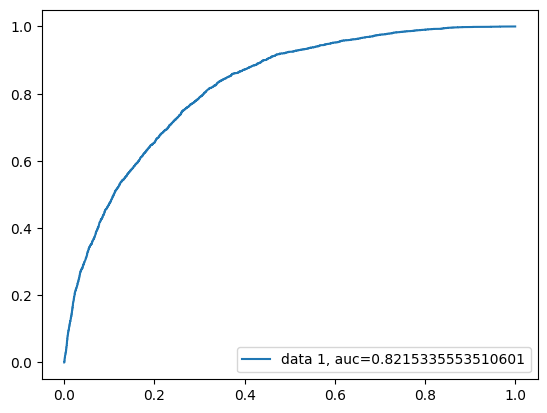

In [213]:
#ROC Curve
import matplotlib.pyplot as plt

y_pred_probability_real = model1.predict_proba(x_test_real)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_real, y_pred_probability_real)
auc = metrics.roc_auc_score(y_test_real, y_pred_probability_real)
plt.plot(fpr, tpr, label = "data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()